# Learn How to use callbacks in fit

In [8]:
# Import standard libraries that you may use most times
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------------------------------
# 1. Some book keeping    
print("TensorFlow version:", tf.__version__)


# 2. Load the data set
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data to 0 through 1
x_train, x_test = x_train / 255.0, x_test / 255.0

print("Shape of the data", x_train.shape, y_train.shape, x_test.shape, y_test.shape)
# -------------------------------------------------------------------------
def plot( x=x_train, y= y_train, image_index=888, yh=""):
    plt.imshow(x[image_index], cmap='Greys');
    plt.title (f"{y[image_index]}: ^{yh}" );
    plt.tick_params(left= False, labelleft = False , labelbottom = False, bottom = False)

# 3. Create a model

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation="softmax")
])

# 4 Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])


TensorFlow version: 2.11.0
Shape of the data (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [14]:
# Creating custom call backs

class MyCallback1(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        keys = list(logs.keys())
        print(f"MyCallback1:++ epoch {epoch}; keys: {keys}")

    def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        print(f"MyCallback1:-- epoch {epoch}; keys: {keys}")


class MyCallback2(tf.keras.callbacks.Callback):
    # You can add more customizzation
    def __init__(self, msg="My Message"):
        super(tf.keras.callbacks.Callback, self).__init__()

    def on_train_begin(self, logs=None):
        keys = list(logs.keys())
        print(f">>> MyCallback2: Training Start; keys: {keys}")

    def on_train_end(self, logs=None):
        keys = list(logs.keys())
        vloss = logs.get("loss")
        # You can end training using following code
        # self.model.stop_training = True
        # Or
        # You can save the model
        #
        # self.model.save("_latest", overwrite=True)

        print(f">>> MyCallback2: Training End  of training; keys: {keys}")


## You may overide these callbacks and do processing.
## This includes ending training, saving models etc.

#def on_train_begin(self, logs=None)
#def on_train_end(self, logs=None):
#def on_test_begin(self, logs=None):
#def on_test_end(self, logs=None):
#def on_predict_begin(self, logs=None):
#def on_predict_end(self, logs=None):
#def on_train_batch_begin(self, batch, logs=None):
#def on_train_batch_end(self, batch, logs=None):
#def on_test_batch_begin(self, batch, logs=None):
#def on_test_batch_end(self, batch, logs=None):
#def on_predict_batch_begin(self, batch, logs=None):
#def on_predict_batch_end(self, batch, logs=None):

In [ ]:
# You can also use pre built callbacks
# See refrence: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks
#

In [15]:
model.fit(x_train, y_train, epochs=3, verbose= False, callbacks=[MyCallback1(), MyCallback2()])

>>> MyCallback2: Training Start; keys: []
MyCallback1:++ epoch 0; keys: []
MyCallback1:-- epoch 0; keys: ['loss', 'accuracy']
MyCallback1:++ epoch 1; keys: []
MyCallback1:-- epoch 1; keys: ['loss', 'accuracy']
MyCallback1:++ epoch 2; keys: []
MyCallback1:-- epoch 2; keys: ['loss', 'accuracy']
MyCallback1:++ epoch 3; keys: []
MyCallback1:-- epoch 3; keys: ['loss', 'accuracy']
MyCallback1:++ epoch 4; keys: []
MyCallback1:-- epoch 4; keys: ['loss', 'accuracy']
>>> MyCallback2: Training End  of training; keys: ['loss', 'accuracy']


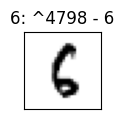

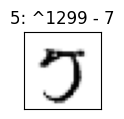

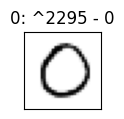

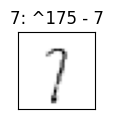

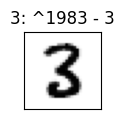

In [34]:
import random

for j in range(5):
    i=random.randint(0,len(x_test))
    plt.figure(figsize=(1,1))
    p = model(x_test[i, np.newaxis])
    plot(x_test, y_test, i, f'{i} - {np.argmax(p)}')
    plt.show()